<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/Hierarchical_Clustering_Example_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# save data under variable name Iris_data
Iris_data = pd.read_csv("IrisData.csv")

# display first few rows of data
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# See species of plants
Iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
X = Iris_data[["SepalLengthCm","PetalLengthCm","PetalWidthCm"]]

# Display shape of data (no. rows, no.columns)
X.shape

(150, 3)

<ipython-input-5-fab381838e6e>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, s=40, c= Iris_data["Species"].map(colors) ,cmap = colors, marker='o', alpha=0.5)


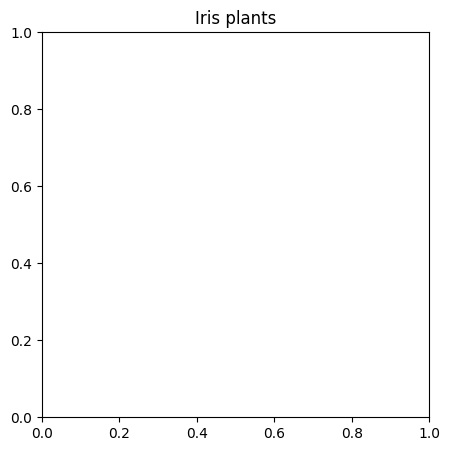

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches


# variables
x = X.iloc[:,0]
y = X.iloc[:,1]
z = X.iloc[:,2]

# axes instance
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)


# color-code species
colors = {'Iris-setosa':'orange', 'Iris-versicolor':'grey', 'Iris-virginica':'lightblue'}


# plot
ax.scatter(x, y, z, s=40, c= Iris_data["Species"].map(colors) ,cmap = colors, marker='o', alpha=0.5)

#legend
orange_patch = mpatches.Patch(color='orange', label='Iris-setosa')
grey_patch = mpatches.Patch(color='grey', label='Iris-versicolor')
lightblue_patch = mpatches.Patch(color='lightblue', label='Iris-virginica')
ax.legend(handles=[orange_patch, grey_patch, lightblue_patch ])

#title
plt.title("Iris plants")

# axes labels
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
hc = hc.fit(X)
hc.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 0, 'PetalWidthCm')

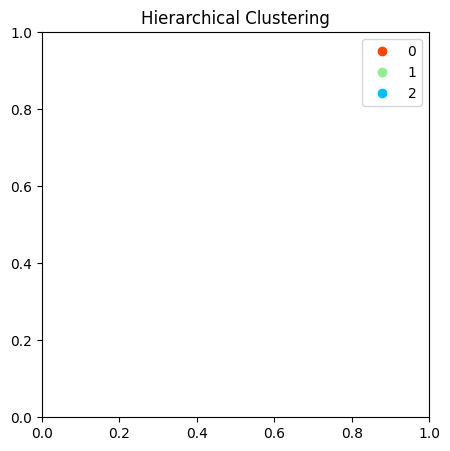

In [7]:
from matplotlib.colors import ListedColormap

# create a color map for each cluster
cmap = ListedColormap(["orangered", "lightgreen", "deepskyblue"])

# variables
x = X.iloc[:,0] # SepalLengthCm
y = X.iloc[:,1] # PetalLengthCm
z = X.iloc[:,2] # PetalWidthCm

# axes instance
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

# plot
sc = ax.scatter(x, y, z, s=40, c = hc.labels_, cmap = cmap, marker='o', alpha=1)

# legend
plt.legend(*sc.legend_elements())

#title
plt.title("Hierarchical Clustering")

# axes labels
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')


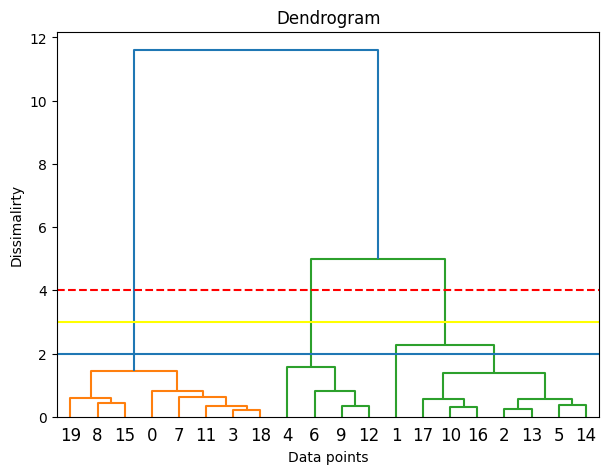

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# define linkage
linked = linkage(X.sample(n=20, random_state=1), 'ward')

# set figure size
plt.figure(figsize=(7, 5))

# dendrogram function
dendrogram(linked,
            orientation='top')
plt.axhline(y=4,color='red',linestyle='--')
plt.axhline(y=3,color='yellow')
plt.axhline(y=2)
# axis labels
plt.title("Dendrogram")
plt.ylabel("Dissimalirty")
plt.xlabel("Data points")

plt.show()

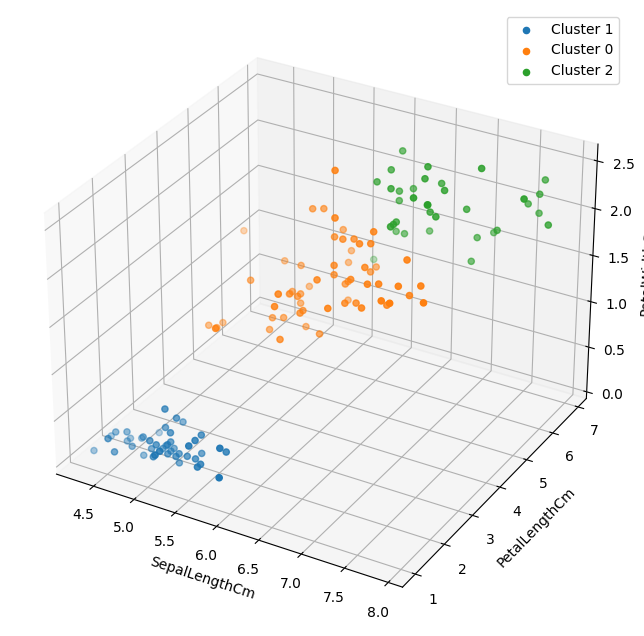

In [10]:
# Asignar puntos de datos a clusters
Iris_data['Cluster'] = hc.labels_

# Graficar clusters en 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in Iris_data['Cluster'].unique():
    cluster_data = Iris_data[Iris_data['Cluster'] == cluster]
    ax.scatter(cluster_data['SepalLengthCm'], cluster_data['PetalLengthCm'], cluster_data['PetalWidthCm'], label=f'Cluster {cluster}')

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

plt.legend()
plt.show()


In [48]:
# Asignar puntos de datos a clusters
Iris_data['Cluster'] = hc.labels_

# Crear una tabla con información de individuos y clusters
tabla_clusters = pd.concat([Iris_data[['Id', 'Species']], pd.DataFrame({'Cluster': hc.labels_})], axis=1)

# Mostrar la tabla
print(tabla_clusters)


      Id         Species  Cluster
0      1     Iris-setosa        1
1      2     Iris-setosa        1
2      3     Iris-setosa        1
3      4     Iris-setosa        1
4      5     Iris-setosa        1
..   ...             ...      ...
145  146  Iris-virginica        2
146  147  Iris-virginica        0
147  148  Iris-virginica        2
148  149  Iris-virginica        2
149  150  Iris-virginica        0

[150 rows x 3 columns]


In [12]:
# Contar cuántos individuos pertenecen a cada cluster
conteo_clusters = Iris_data['Cluster'].value_counts()

# Crear una tabla con el conteo de individuos por cluster
tabla_conteo_clusters = pd.DataFrame({'Cluster': conteo_clusters.index, 'Cantidad': conteo_clusters.values})

# Mostrar la tabla
print(tabla_conteo_clusters)


   Cluster  Cantidad
0        0        64
1        1        50
2        2        36


In [13]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(Iris_data['Species'], Iris_data['Cluster'])

# Mostrar la tabla
print(tabla_contingencia)


Cluster           0   1   2
Species                    
Iris-setosa       0  50   0
Iris-versicolor  50   0   0
Iris-virginica   14   0  36


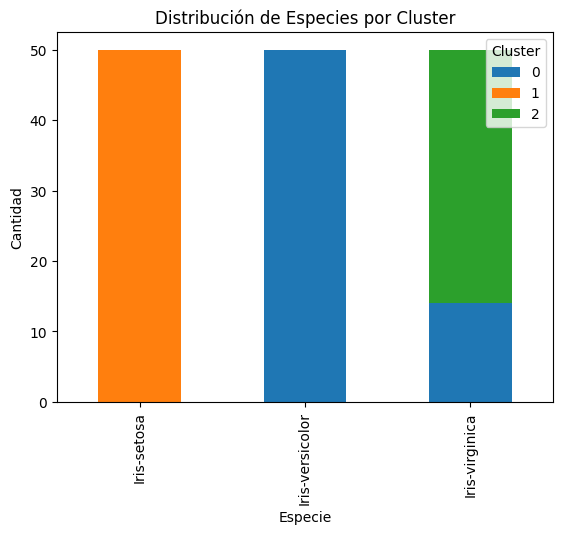

In [14]:
# Gráfico de barras
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Distribución de Especies por Cluster')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.show()


In [21]:
# Características del nuevo individuo
nuevo_individuo = pd.DataFrame({
    'SepalLengthCm': [5.0,2.3,1.5],
    'PetalLengthCm': [1.5,2.0,1.34],
    'PetalWidthCm': [0.5,4.5,2.3]
})

# Crear un conjunto de datos con más de un individuo (en este caso, se repite el mismo individuo)
nuevos_individuos = pd.concat([nuevo_individuo], ignore_index=True)

# Usar el modelo de clustering para predecir los clusters de los nuevos individuos
clusters_predichos = hc.fit_predict(nuevos_individuos)

# Mostrar los clusters predichos
print("Clusters predichos para los nuevos individuos:")
print(clusters_predichos)


Clusters predichos para los nuevos individuos:
[1 2 0]


In [34]:
# Características del nuevo individuo
nuevo_individuo = [[5.0], [1.5], [0.5]]

# Usar el modelo de clustering para predecir el cluster del nuevo individuo
cluster_predicho = hc.fit_predict(nuevo_individuo)

print(f"El nuevo individuo pertenece al cluster: {cluster_predicho[0]}")


El nuevo individuo pertenece al cluster: 1


In [49]:
from sklearn.metrics import silhouette_score

# Calcular el índice de silueta
silhouette_avg = silhouette_score(X, hc.labels_)
print(f"Iterative Clustering - Silhouette Score: {silhouette_avg}")


Iterative Clustering - Silhouette Score: 0.5868414020749555


In [50]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Crear y ajustar el modelo de clustering
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
hc_labels = hc.fit_predict(X)

# Calcular el índice de silueta
silhouette_avg = silhouette_score(X, hc_labels)
print(f"Hierarchical Clustering - Silhouette Score: {silhouette_avg}")


Hierarchical Clustering - Silhouette Score: 0.5868414020749555


El índice de silueta es una medida de cuán similar es un objeto a su propio clúster (cohesión) en comparación con otros clústeres (separación). Varía en un rango de -1 a 1, donde:

- Un valor cercano a 1 indica que el objeto está bien emparejado con su propio clúster y mal emparejado con clústeres vecinos.
- Un valor cercano a 0 indica que el objeto está en o muy cerca del límite de decisión entre dos clústeres.
- Un valor cercano a -1 indica que esos casos pueden haber sido asignados al clúster incorrecto.

En tu caso, un índice de silueta de 0.587 es bastante bueno. Indica que la configuración de clústeres resultante del algoritmo de clustering jerárquico es bastante apropiada, con objetos bien emparejados dentro de sus clústeres y bien separados de otros clústeres.

En resumen, un índice de silueta alto sugiere que la configuración de clústeres es coherente y que los objetos se asignan correctamente a sus respectivos clústeres en comparación con otras posibles asignaciones.

In [37]:
import pandas as pd

# Agregar la etiqueta del cluster a los datos originales
Iris_data['Cluster'] = hc.labels_

# Contar el número de individuos en cada cluster
conteo_por_cluster = Iris_data['Cluster'].value_counts().sort_index()

# Calcular el porcentaje en relación con el total
porcentaje_por_cluster = (conteo_por_cluster / len(Iris_data)) * 100

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Cluster': conteo_por_cluster.index,
    'Número de Individuos': conteo_por_cluster.values,
    'Porcentaje': porcentaje_por_cluster.values
})

print(resultados)


   Cluster  Número de Individuos  Porcentaje
0        0                    64   42.666667
1        1                    50   33.333333
2        2                    36   24.000000
